In [2]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [3]:
# width,height,channels
image_shape = (224,224,3)
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
#Data preparation - image (normalisng)
#using datagenerator Api
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               rescale=1/255, # Rescale the image by normalzing it.
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Creating the Model - CNN


In [5]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer only one dense, remember its binary, 0=Benign , 1=Malignant
model.add(Dense(1))
model.add(Activation('sigmoid'))

#loss fn  -  binar_crossentropy bcs 0 or 1 prediction 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
__________

### Training the Model

In [8]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../skin-cancer-malignant-vs-benign/Data/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2637 images belonging to 2 classes.


In [9]:
test_image_gen = image_gen.flow_from_directory('../skin-cancer-malignant-vs-benign/Data/test',
                                                 target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 661 images belonging to 2 classes.


In [10]:
train_image_gen.class_indices

{'benign': 0, 'malignant': 1}

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
#the number of samples processed for each epoch is batch_size * steps_per_epochs
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12,
                             )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50/50 [==============================] - 87s 2s/step - loss: 0.6854 - acc: 0.5550 - val_loss: 0.6539 - val_acc: 0.5573
Epoch 2/100
50/50 [==============================] - 38s 759ms/step - loss: 0.5563 - acc: 0.7025 - val_loss: 0.5661 - val_acc: 0.7396
Epoch 3/100
50/50 [==============================] - 36s 722ms/step - loss: 0.5618 - acc: 0.7350 - val_loss: 0.4875 - val_acc: 0.7656
Epoch 4/100
50/50 [==============================] - 35s 693ms/step - loss: 0.5993 - acc: 0.6657 - val_loss: 0.5225 - val_acc: 0.7680
Epoch 5/100
50/50 [==============================] - 30s 596ms/step - loss: 0.5160 - acc: 0.7362 - val_loss: 0.5421 - val_acc: 0.7604
Epoch 6/100
50/50 [==============================] - 32s 631ms/step - loss: 0.5267 - acc: 0.7338 - val_loss: 0.4667 - val_acc: 0.7760
Epoch 7/100
50/50 [==============================] - 29s 582ms/step - loss: 0.3968 - acc: 0.8337 - val_loss: 0.5116 - val_acc: 0.7072
Epoch 8/100
50/50

In [13]:
import numpy as np
print(np.mean(results.history['acc']))
print(np.mean(results.history['val_acc']))
print(np.mean(results.history['loss']))
print(np.mean(results.history['val_loss']))


0.8084847396916848
0.7944777279730002
0.40030489936271574
0.43141445797585076


# Evaluating the Model

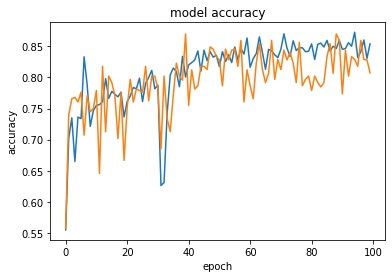

In [14]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

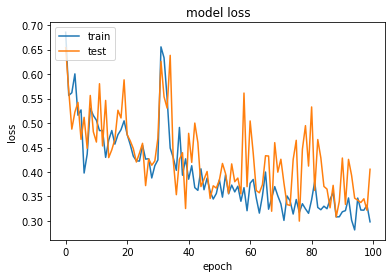

In [15]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predicting on new images

In [16]:
train_image_gen.class_indices

{'benign': 0, 'malignant': 1}

In [17]:
import numpy as np
from keras.preprocessing import image

benign_file = '../skin-cancer-malignant-vs-benign/Data/test/benign/790.jpg'

benign_img = image.load_img(benign_file)

benign_img = image.img_to_array(benign_img)
benign_img = benign_img/255
benign_img = benign_img.reshape(1,224,224,3)


In [18]:
prediction_prob = model.predict(benign_img)

In [19]:
# Output prediction
print(f'Probability that image is a Belign is: {prediction_prob} ')

Probability that image is a Belign is: [[0.00064657]] 
